In [43]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
fashion_data = tf.keras.datasets.fashion_mnist

In [3]:
(train_img,train_lable),(test_img,test_lable) = fashion_data.load_data()

In [4]:
train_img

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [79]:
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
train_img.shape

(60000, 28, 28)

In [8]:
test_img.shape

(10000, 28, 28)

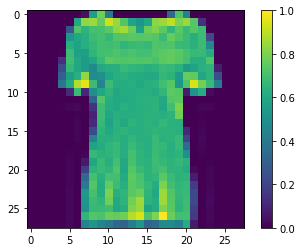

In [77]:
plt.figure()
plt.imshow(train_img[10])
plt.colorbar()
plt.show()

In [10]:
#We scale the image values to 0 & 1
train_img = train_img/255.0

test_img = test_img/225.0

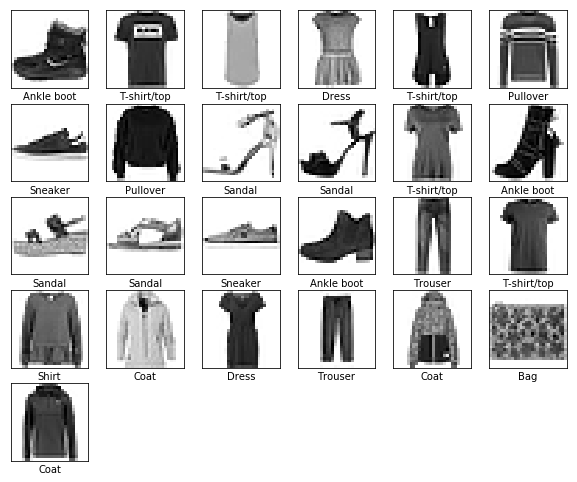

In [11]:
#diaplay the images with labels below them before training the neural network
plt.figure(figsize=(10,10)) #setting figure size
#displaying first 25 images 
for i in range(25):
    plt.subplot(6,6,i+1)#rows,columns,index
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_img[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lable[i]])
plt.show()

## Building the model
1 build neural network
2 compile the model 

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Now we compile the model 
    Before Compiling we need to add
        * Loss Function = To measure accuracy of mmodel (this value should be min)
        * Optimizer = This is how the model is updated based on the data it sees and its loss function.
        *Metrics —Used to monitor the training and testing steps.

In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Now train the model 
### To train 
    * Feed training images and training lables
    * The model will learn to associate images and lables
    * Then make the model to make predictions on the testing set
    
  * To start training we call model.fit to fit the model in the training data

In [54]:
# epoch is the number of iterations - the number of times the model will be fit 

In [55]:
model.fit(train_img,train_lable,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 20s 339us/sample - loss: 0.4878 - acc: 0.8252
Epoch 2/5
60000/60000 [==============================] - 20s 329us/sample - loss: 0.3655 - acc: 0.8653
Epoch 3/5
60000/60000 [==============================] - 20s 333us/sample - loss: 0.3269 - acc: 0.8786
Epoch 4/5
60000/60000 [==============================] - 20s 334us/sample - loss: 0.3067 - acc: 0.8849
Epoch 5/5
60000/60000 [==============================] - 21s 353us/sample - loss: 0.2879 - acc: 0.8918


In [56]:
#the accuracy acheives is 82%
#now we check for test set

In [57]:
test_loss,test_accuracy = model.evaluate(test_img,test_lable)

10000/10000 [==============================] - 2s 178us/sample - loss: 0.3426 - acc: 0.8788


In [58]:
print('Test Accuracy = ',test_accuracy*100)

Test Accuracy =  87.87999749183655


### Now we make predictions

In [19]:
predictions = model.predict(test_img)

In [59]:
predictions[0]

array([2.1683093e-07, 1.4372389e-08, 2.3085316e-09, 7.2815533e-14,
       1.1274951e-08, 2.4555888e-04, 3.7531553e-08, 1.9615974e-02,
       3.6894754e-08, 9.8013812e-01], dtype=float32)

In [80]:
np.argmax(predictions[10])

4

In [81]:
test_lable[10]

4

In [82]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

(28, 28)


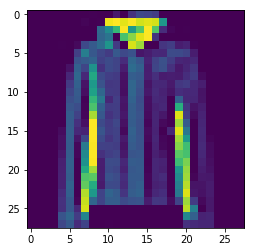

In [95]:
# Grab an image from the test dataset
img = test_img[6]
plt.imshow(test_img[6])
plt.show
print(img.shape)

In [96]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


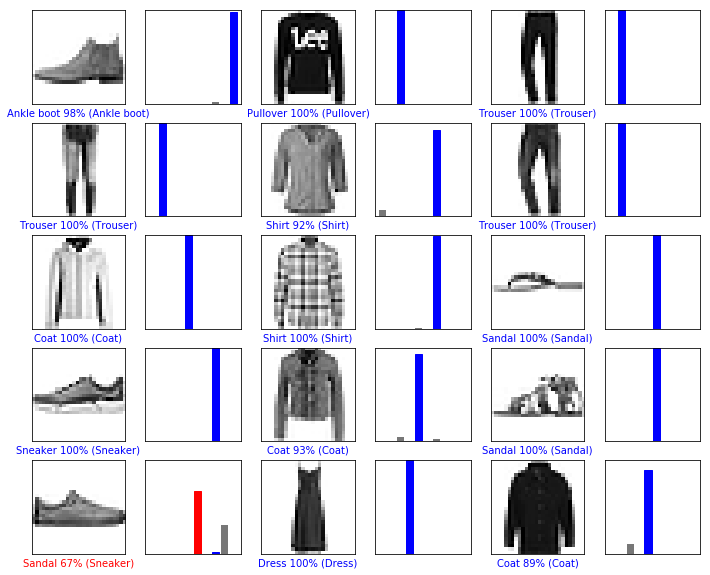

In [102]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_lable, test_img)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_lable)
plt.show()

In [103]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.2446147e-05 6.1870901e-07 2.3733019e-03 2.5077654e-06 9.9324197e-01
  2.2920369e-11 4.3390864e-03 2.0827944e-12 3.0618164e-08 4.4346777e-13]]


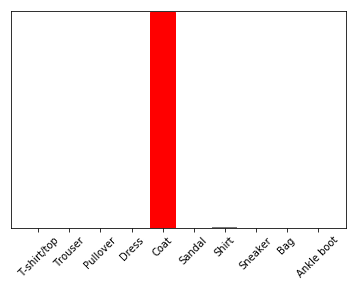

In [104]:
plot_value_array(0, predictions_single, test_lable)
plt.xticks(range(10), class_names, rotation=45)
plt.show()